In [127]:
import pandas as pd
import re
import numpy as np

**Задача 1 (2 балла). Чтение данных ** 

Прочитайте данные из файла spam.csv используя средства модуля [pandas](https://pandas.pydata.org/). В первом столбце пометка о роде письма (spam/ham). Будем считать, что все письма с пометкой spam лежать в первом классе, а остальные в нулевом. Во второй колонке текст сообщения. Отобразите таблицу в следующем виде
![example](table_example.png)

In [128]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.rename(columns={'v1': 'class'})
df = df.dropna(axis=1)
df['class'] = df['class'].map({'spam': 1, 'ham': 0})
df


,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


**Задача 2 (3 балла). Предобработка ** 

Переведите все буквы в нижний регистр. 

С помошью [регулярных выражений](https://docs.python.org/2/library/re.html) почистите текст оставляя только слова (удалите знаки препинания, а также все числа можно заменить на N и т.п.). 

Оформите это в виде функции, которая принимает на вход некоторый список текстов и возвращает, соответственно, предобработанный список текстов. 

Преобразуйте таблицу с данными так, чтобы в ней содержались предобработанные тексты (далее мы будем работать только с ними).

In [129]:
def set_clean(str):
    clean_line = re.sub('[\W\d_-]+', ' ', str.lower().strip())
    return re.sub(' +', ' ', clean_line)
# print(set_clean(df['text'][9]))

**Задача 3 (3 балла). Формирование словаря** 

Сформируйте словарь, ключами которого являются слова, встречающиеся в тексте, а значениями -- колличество раз, которое они встретились в корпусе текста. 

Оформите это в виде функции, которая принимает на вход список текстов и возвращает словарь. 

Какой размер словаря вы получили?

In [130]:
from collections import Counter
def dictionary(data, cleaner):
    words = []
    for line in data:
        words += re.split(' +', cleaner(line))
    words = [word for word in words if word != '']
    return sorted(Counter(words).items(), key=lambda item: -item[1])
lst = dictionary(df['text'], set_clean)
print(lst[:10])

[('i', 3018), ('you', 2243), ('to', 2242), ('a', 1451), ('the', 1332), ('u', 1212), ('and', 979), ('in', 902), ('is', 890), ('me', 803)]


In [131]:
print(len(lst))

7708


**Задача 4 (2 балла). Удаление стоп-слов** 

Отсортируйте слова по убыванию частоты их встречаемости в текстах. 

С помощью модуля [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html) постройте график частот встречаемости слов в тексте. 

Распечатайте топ-10 слов и их частоты. 

Какие слова чаще всего встречаются в тексте? Значимые ли это слова? 

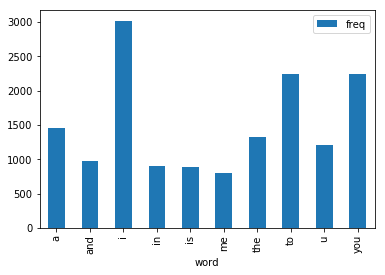

In [132]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
DF = pd.DataFrame(data = lst[0:10], columns=['word', 'freq'])
DF.groupby('word').sum().plot.bar()

Чаще всего встречаются служебные слова - артикли и предлоги. Также очень частотными оказались местоимения i, you, me. Как правило, они довольно бесполезны и при обработке текстов удаляются. 

**Задача 5 (5 баллов). Функциия предобработки и удаление стоп-слов. ** 

Для удаления стоп-слов можно использовать модуль [nltk](http://www.nltk.org/). Импортируйте stopwords из nltk.corpus, далее чтобы получить список английских стоп-слов нужно сделать stopwords.words('english').

Перепишите функцию предобрабитки так, чтобы она на вход принимала список текстов и список стоп-слов, чистила текст (в том числе удаляла стоп-слова), возвращала список предобработанных текстов.  

Преобразуйте таблицу с данными так, чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними). 

Сформируйте словарь. 

Постройте график частот встречаемости слов в тексте. 

Распечатайте топ-10 слов и их частоты. 

Какой размер словаря вы получили теперь? Остались ли ещё высокочастотные неинформативные слова? Что это за слова? Добавьте их в список стоп-слов и повторите процедуру.

In [133]:
import nltk
from nltk.corpus import stopwords

In [134]:
def set_clean_and_remove_stopwords(s):
    clean_line = re.sub('[\W\d_-]+', ' ', s.lower().strip())
    words = re.split(' +', clean_line)
    stopset = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stopset]
    return ' '.join(filtered_words)

print(set_clean_and_remove_stopwords(df['text'][9]))


mobile months u r entitled update latest colour mobiles camera free call mobile update co free 


In [135]:
lst = dictionary(df['text'], set_clean_and_remove_stopwords)
print(lst[:10])

[('u', 1212), ('call', 606), ('get', 397), ('ur', 385), ('gt', 318), ('lt', 316), ('ok', 292), ('free', 288), ('go', 286), ('know', 261)]


In [136]:
print(len(lst))

7564


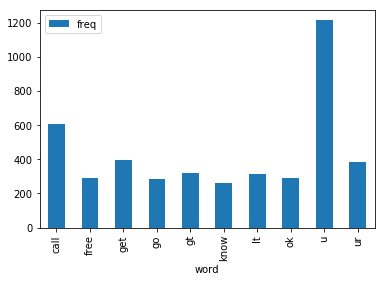

In [137]:
%matplotlib inline
DF = pd.DataFrame(data = lst[0:10], columns=['word', 'freq'])
DF.groupby('word').sum().plot.bar()

In [138]:
stopset = set(nltk.corpus.stopwords.words('english'))
stopset.add('u')
stopset.add('ok')
stopset.add('ur')

In [139]:
def set_clean_without_custom_stopwords(stopwords):
    def fun(s):
        clean_line = re.sub('[\W\d_-]+', ' ', s.lower().strip())
        words = re.split(' +', clean_line)
        filtered_words = [word for word in words if word not in stopwords]
        return ' '.join(filtered_words)
    return fun

# print(set_clean_without_custom_stopwords(stopset)(df['text'][10]))


In [140]:
lst = dictionary(df['text'], set_clean_without_custom_stopwords(stopset))

In [141]:
print(len(lst))

7561


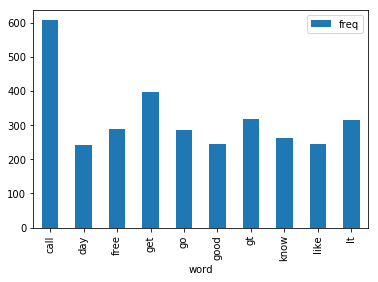

In [142]:
%matplotlib inline
DF = pd.DataFrame(data = lst[0:10], columns=['word', 'freq'])
DF.groupby('word').sum().plot.bar()

**Задача 6 (5 баллов). Удаление низко частотных слов** 

По сформированому на предыдущем шаге словарю посмотрите, какой процент слов встречается больше одного раза. Нужны ли нам слова которые встретились только один раз? 

Преобразуйте функцию предобработки таким образом, что бы в ней, кроме всего прочего, формировался словарь и удалялись слишком редкие слова. 

Преобразуйте таблицу с данными, так чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними). 

Сформируйте словарь. Каков размер словаря теперь?

In [143]:
lst = dictionary(df['text'], set_clean_without_custom_stopwords(stopset))
ones = [item[0] for item in lst if item[1]==1]
print(len(ones)/len(lst))

0.5016532204734824


In [144]:
stopset6 = stopset | set(ones)
betterDf = df.copy()
betterDf['text'] = df['text'].map(set_clean_without_custom_stopwords(stopset6))
betterDict = [item for item in lst if item[1] != 1]
print(len(betterDict))

3768


### Задача 7 (5 баллов). Представление в виде мешка слов
Реализуйте свою функцию, которая по списку текстов строит представление в виде мешка слов. На вход подаётся список текстов, а возвращает список имен признаков (т.е. слова по которым мы строим представление -- их порядок должен быть зафиксирован) и numpy.array, который содержит вектора, каждая позиция которого -- число вхождений данного признака (слова) в текст.
Сейчас мы реализовываем данную функцию в учебных целях, а вообще велосипед изобретать не стоит! 

Если вам нужно такое представление, то задействуйте модуль sklearn.feature_extraction.text. Импортируйте из него класс CountVectorizer. 

Создайте экземпляр класса с параметрами по умолчанию, а далее примените метод fit_transform для извлечения векторного представления текста. Чтобы получить список имён признаков нужно воспользоваться методом get_feature_names. Проверьте что ваша функция работает также (с точностью до перестановки признаков).
Измерьте скорость работы вашей и метода fit_transform. Для этого можно воспользоваться функцией time из модуля time. Постарайтесь максимально оптимизировать вашу функцию (время работы функции не должно привышать 10 с., за привышения лимита будут сняты баллы).

**Здесь, к сожалению, мне задача стала не очень понятна, к тому же мы мало занимались такими вещами на семинарах. Поэтому просто попробовала сделать то же самое при помощи sklearn.**

In [145]:
# from sklearn.feature_extraction.text import*
from sklearn.feature_extraction.text import CountVectorizer

In [146]:
count_vect = CountVectorizer()

In [147]:
# lst_dict = dict((x, y) for x, y in betterDict)
my_list = [2, 3, 5, 7, 11]
my_dict = {k: 0 for k in my_list if k < 5}
my_dict

{2: 0, 3: 0}

In [151]:
def dictorizer(cleaner):
    def func(line):
        words = re.split(' +', cleaner(line))
        words = [word for word in words if word != '']
        return ' '.join(words)
    return func
lst_dict = list(df['text'].map(dictorizer(set_clean_without_custom_stopwords(stopset6))))
#lst_dict

In [152]:
count_vect.fit_transform(lst_dict)

<5572x3752 sparse matrix of type '<class 'numpy.int64'>'
	with 40752 stored elements in Compressed Sparse Row format>

In [153]:
#count_vect.get_feature_names()

**Задача 8 (5 баллов). Представление с использованием TfIdf** 

Задание аналогичное заданию 7, но теперь  признаки должны содержать значение tf-idf. 

Реализация должна быть на numpy.array, а не на списках!

Аналогичная функция также содержится в [sklearn.feature_extraction.text](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text)

** Задача 9 (10 баллов). Решение задачи классификации**

Теперь с помощью наших представлений и [метода K ближайших соседей (KNN)](http://www.machinelearning.ru/wiki/index.php?title=KNN) ([нужный класс](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [полезная ссылочка](https://habrahabr.ru/post/149693/)) научимся вычислять спам.

Пусть X -- вектора признаков (полученные с помощью CountVectorizer или TfidfVectorizer), y -- вектор ответов (в нашем случае колонка class в таблице). 

Разделите (X, y) на обучающую выворку (X_train, y_train) (70%) и на тестовую -- (X_test, y_test) (30%). Разделить выборку можно вручную, но лучше воспользоваться [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

Далее обучите классификатор на (X_train, y_train) -- это делается с помощью метода fit. Затем получите y_pred (результат классификации) на тесте X_test с помощью метода predict. После чего сравните получившийся результат y_pred и y_test (правильные метки классов) с помощью функции [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). 

Поиграйте с параметром n_neighbors у KNN -- добейтесь наилучшего результата классификации.

Сравните качество классификации для представлений 